# Exercise: Machine Learning Basics

Version: SoSe 2022

Estimated time needed: 90 minutes

Author: Jenny Kozielski

______

# Objectives

After completing this exercise you will be able to:

- Recognize good features and define them
- Explain basic conecpts of linear regression and apply simplified linear regression
- Calculate information gain
- Understand and interprete onfusion matrices
- Understand and calculate accuracy, precision, recall and $F_1$-measure, as well as make statements in this regard for new problems

**Reminder: Please upload this exercise on [Google Colab](https://colab.research.google.com/) so you would be able to work on the tasks**

**Reading material:<br>
Mandatory: Chapter 18.1-18.3 of Russell & Norvig**

# Task 1
### Russell & Norvig, Chapter 18 Learning from Examples, 18.2, german version (3. edition): page 812

What is occam's razor?

<details><summary>Click here for the solution</summary>

## Solution:

The principle, that the simplest hypothesis, which is consistent with the data, gets picked.
</details>

# Task 2
### Russell & Norvig, Chapter 18 Learning from Examples, 18.3.6, german version (3. edition): page 823
### + Own Research

How can a learning algorithm handle it, if for an instance one feature could not be recorded (N/A Wert, missing values)?

<details><summary>Click here for the solution</summary>

## Solution:    
    
For example:<br>
* delete instance
* use median of the feature
* feature will be determined due to other features and probability

</details>

# Feature Engineering

# Task 3

The SCHUFA calculates for each person the probability that this person will meet your payment obligations in the future. Which features do you think will be used for this? Create a list of possible features. Describe how the feature is collected/measured and name the type of values (binary, nominal, ordinal, numeric).

<details><summary>Click here for the solution</summary>

## Solution:

Example:
* Age (date of birth): numeric
* Sex (name?): binary/nominal
* Number of accounts (bank query): numeric
* Number of reminders in the last year (?)
* Place of residence (PLZ): nominal (Attention, PLZ is not "real" numeric, only 5-digit numbers)
* Credit card debt (bank query): numeric
* ..-

It is not known exactly which data the Schufa uses.
    
</details>

# Task 4

You are commissioned by a company to design a system for the automatic classification of computer games into age categories.
The list of categories is '0', '6', '12' and '18'.
This is the minimum age to play the game.
For each game there is the following meta information, which can be used for classification:
* the name of the game,
* dthe name of the developer company,
* a text describing the content of the game.

1. Define four features that you can use for classification. Explain why they might be helpful.

<details><summary>Click here for the solution</summary>

## Solution:

Frequency distribution of words, name of game, name of developer company, contains special words (e.g.
Sex, murder, . . . )
</details>

2. How would you divide the data if you wanted to train the best possible classifier, but at the same time want to check if it is really the best one? Justify your division.

<details><summary>Click here for the solution</summary>

## Solution:

Randomized division into training set and test set (ratio 9:1 or 8:2). Cross-validation or Leave-one-out on the training set and final test on the test set
</details>

3. In addition to the existing metadata, you will be given the opportunity to request any other information about the Game that is commonly known (other than the age rating itself). Name three additional features that are likely to increase classification accuracy. Explain briefly why you think these features will be helpful.

<details><summary>Click here for the solution</summary>

## Solution:

* Play time: Children's games rather short. Adult games rather long.
* Genre: Shooter often FSK 18, Jump n' run rather rare.
* Known characters: Children's games often contain well-known repetitive characters that are easy to remember.
and usually perform a mascot function.
* Name of the chief developer: In the games industry, a certain chief developer often works on games that are very similar or even successors.
    
</details>

# Information Gain

# Task 5

You have the following (fictitious) patient data and the corresponding diagnoses.

| Patient | Fieber | Übergeben | Durchfall | Zittern | Diagnose                  |
|---------|--------|-----------|-----------|---------|---------------------------|
| 1       | nein   | nein      | nein      | nein    | gesund (g)                |
| 2       | leicht | nein      | nein      | nein    | Grippe (G)                |
| 3       | hoch   | nein      | nein      | ja      | Grippe (G)                |
| 4       | hoch   | ja        | ja        | nein    | Salmonellenvergiftung (S) |
| 5       | leicht | nein      | ja        | nein    | Salmonellenvergiftung (S) |
| 6       | nein   | ja        | ja        | nein    | Darmentzündung (D)        |
| 7       | leicht | ja        | ja        | nein    | Darmentzündung (D)        |

What symptom should you ask a patient about first? Calculate the Information Gain for each feature.

<details><summary>Click here for the solution</summary>

## Solution:

Sample calculation for the first (root) node.
* Entropy of the given dataset:
$ Entropy(S) = -\frac{1}{7}log_2(\frac{2}{7})-\frac{2}{7}log_2(\frac{2}{7})-\frac{2}{7}log_2(\frac{2}{7})-\frac{2}{7}log_2(\frac{2}{7})$
* Consider attribute x = "Fieber"

| Values     | g      | G    | S   | D    | Entropy(Si)                 |
|------------|--------|------|-----|------|-----------------------------|
| S1(nein)   | *      | -    | -   | *    | [1/2, 0, 0, 1/2] –> 1       |
| S2(leicht) | -      | *    | *   | *    | [0, 1/3, 1/3, 1/3] –> 1.585 |
| S3(hoch)   | -      | *    | *   | -    | [0, 1/2, 1/2, 0] –> 1       |

$ Entropy(S|Fieber) = \frac{2}{7}*1+\frac{3}{7}*1.585+\frac{2}{7}*1 = 1.251$
<br>
* Consider attribute x = "Übergeben"

| Values   | g      | G    | S   | D    | Entropy(Si)               |
|----------|--------|------|-----|------|---------------------------|
| S1(ja)   | -      |  -   | *   | **   | [0, 0, 1/3, 2/3] –> 0.918 |
| S2(nein) | *      | **   | *   |  -   | [1/4, 2/4, 1/4, 0] –> 1.5 |

$ Entropy(S|Übergeben) = \frac{3}{7}*0.918+\frac{4}{7}*1.5 = 1.251$
<br>

* Consider attribute x = "Durchfall"

| Values   | g      | G    | S   | D    | Entropy(Si)               |
|----------|--------|------|-----|------|---------------------------|
| S1(ja)   | -      | -    | **  | **   | [0, 0, 2/4, 2/4] –> 1     |
| S2(nein) | *      | **   | -   | -    | [1/3, 2/3, 0, 0] –> 0.918 |

$ Entropy(S|Durchfall) = \frac{4}{7}*1+\frac{3}{7}*0.918 = 0.965$
<br>

* Consider attribute x = "Zittern"

| Values   | g      | G    | S   | D    | Entropy(Si)                  |
|----------|--------|------|-----|------|------------------------------|
| S1(ja)   | -      | *    | -   | -    | [0, 1, 0, 0] –>0             |
| S2(nein) | *      | *    | **  | **   | [1/6, 1/6, 2/6, 2/6] –>1.918 |

$ Entropy(S|Zittern) = \frac{1}{7}*0+\frac{6}{7}*1.918 = 1.644$


The attribute that maximizes the Information Gain.
* Fieber: $Gain(S) = Ent(s) - Ent(S|Fieber) = 1.95 - 1.251 = 0.699$
* Erbrechen: $Gain(S) = Ent(s) - Ent(S|Erbrechen) = 1.95 - 1.251 = 0.699$
* Durchfall: $Gain(S) = Ent(s) - Ent(S|Durchfall) = 1.95 - 0.965 = 0.985$
* Zittern: $Gain(S) = Ent(s) - Ent(S|Zittern) = 1.95 - 1.251 = 0.699$
    
The attribute "Durchfall" is the most effective attribute; it maximizes the Information Gain.
    
</details>

# Evaluation

# Task 6

Which of the following statements regarding confusion matrices are true or false?

1. The entries on the main diagonal are always 1.

<details><summary>Click here for the solution</summary>

## Solution:

Wrong, the entries on the main diagonal represent the number of correctly classified instances.

</details>

2. The cell (i , j) contains the number of times the class i was wrongly classified as j (under the condition i ̸= j).

<details><summary>Click here for the solution</summary>

## Solution:
    
Correct
</details>

3. The Confusion Matrix can be used to identify problems with classification.

<details><summary>Click here for the solution</summary>

## Solution:

Correct. For example, if class i is very often misclassified as class j, this is an important hint to look for features that differentiate classes i and j.
    
</details>

4. The Confusion Matrix can be used to compare two different classifiers.

<details><summary>Click here for the solution</summary>

## Solution:

Correct
</details>

5. The number of columns is always equal to the number of rows.

<details><summary>Click here for the solution</summary>

## Solution:
    
Correct
</details>

# Task 7

The system from Task 5. for the automatic classification of computer games into age categories is developed in two variants. Which of the two variants would you recommend if the top priority is to protect children from games that are not age-appropriate? Explain your decision.

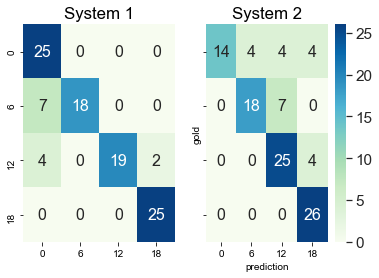

In [4]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

sys1 = [[25, 0, 0, 0],
        [ 7,18, 0, 0],
        [ 4, 0,19, 2],
        [ 0, 0, 0,25]]

sys2 = [[14, 4, 4, 4],
        [ 0,18, 7, 0],
        [ 0, 0,25, 4],
        [ 0, 0, 0,26]] 

labels = [0,6,12,18]

%matplotlib inline
fig, ax = plt.subplots(1,2, sharey='row')
sn.set(font_scale=1.4)#for label size
sn.heatmap(pd.DataFrame(sys1, range(4), range(4)), ax=ax[0], cmap="GnBu", xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 16}, cbar=False).set_title("System 1");
sn.heatmap(pd.DataFrame(sys2, range(4), range(4)), ax=ax[1], cmap="GnBu", xticklabels=labels, yticklabels=labels, annot=True, annot_kws={"size": 16}).set_title("System 2");
plt.xlabel('prediction');
plt.ylabel('gold');

<details><summary>Click here for the solution</summary>

## Solution:

System 2, because System 1 would release dangerous games for children
</details>

# Task 8

A classifier for the detection of spam emails is given. On a test set of emails it shows the following results:

| Mail-ID | Manuelle Einordnung | Automatische Einordnung | TP/FP/TN/FN |
| --- | --- | --- | --- |
| 1 | ok | ok |  |
| 2 | ok | ok |  |
| 3 | spam | spam |  |
| 4 | spam | ok |  |
| 5 | ok | spam |  |
| 6 | ok | ok |  |

1. Calculate Accuracy, Precision(spam), Recall(spam), and $F_1$-measure.

$$acc = \frac{TP+TN}{TP+TN+FP+FN}$$ (acc = all correct classified instances/all instances)

$$P = \frac{TP}{TP+FP}$$

$$R = \frac{TP}{TP+FN}$$

$$F_1 = \frac{2 \times P  \times R}{P+R}$$

<details><summary>Click here for the solution</summary>

## Solution:

| Mail-ID | Manuelle Einordnung | Automatische Einordnung | TP/FP/TN/FN |
| --- | --- | --- | --- |
| 1 | ok | ok | TN |
| 2 | ok | ok | TN |
| 3 | spam | spam | TP |
| 4 | spam | ok | FN |
| 5 | ok | spam | FP |
| 6 | ok | ok | TN |

* $TP = 1$
* $FP = 1$
* $FN = 1$
* $TN = 3$
* $acc = \frac{2}{3}$
* $P(spam) = \frac{1}{2}$
* $R(spam) = \frac{1}{2}$
* $F_1(spam) = \frac{1}{2}$

$$acc = \frac{4}{6}$$
    
$$P = \frac{1}{1+1}$$

$$R = \frac{1}{1+1}$$
    
$$F_1 = \frac{2 \times \frac{1}{2} \times \frac{1}{2}}{\frac{1}{2} + \frac{1}{2}} = \frac{1}{2}$$       
    
</details>

2. With which strategy can you maximize the Recall(SPAM) simply? Calculate A, P, and $F_1$ for this case.

<details><summary>Click here for the solution</summary>

## Solution:

| Mail-ID | Manuelle Einordnung | Automatische Einordnung | TP/FP/TN/FN |
| --- | --- | --- | --- |
| 1 | ok | spam | FP |
| 2 | ok | spam | FP |
| 3 | spam | spam | TP |
| 4 | spam | spam | TP |
| 5 | ok | spam | FP |
| 6 | ok | spam | FP |

* $TP = 2$
* $FP = 4$
* $FN = 0$
* $TN = 0$
* $acc = \frac{1}{3}$
* $P(spam) = \frac{1}{3}$
* $R(spam) = 1$
* $F_1(spam) = \frac{1}{2}$    
    
    
If all emails are classified as spam, the recall is automatically maximum (= catch most instances), since there won't be any FN.
In this case $A = P$, because there is no FN or TN.
Since we have only two real spam mails in the test record, the precision is $\frac{2}{6} = \frac{1}{3}$

$$acc = \frac{2}{6}$$
    
$$P = \frac{2}{2+4}$$

$$R = \frac{2}{2+0}$$    
    
$$F_1 = \frac{2 \times \frac{1}{3} \times 1}{1+\frac{1}{3}} = \frac{1}{2}$$
    
</details>

3. What is the Majority Class (MC) in the above example? What is P(MC), R(MC), and F1 for a classifier that always assigns the Majority Class?

<details><summary>Click here for the solution</summary>

## Solution:

| Mail-ID | Manuelle Einordnung | Automatische Einordnung | TP/FP/TN/FN |
| --- | --- | --- | --- |
| 1 | ok | ok | TP |
| 2 | ok | ok | TP |
| 3 | spam | ok | FP |
| 4 | spam | ok | FP |
| 5 | ok | ok | TP |
| 6 | ok | ok | TP |

* $TP = 4$
* $FP = 2$
* $FN = 0$
* $TN = 0$
* $acc = \frac{2}{3}$
* $P(ok) = \frac{2}{3}$
* $R(ok) = 1$
* $F_1(ok) = \frac{4}{5}$        
    
The Majority Class is the most common class in the data set.
In this case it is OK with 4 occurrences (against SPAM with only 2 occurrences).
Recall is automatically maximum. In this case $A = P$, because there is no FN or TN.
Since we have four emails of the class OK, the Precision is $\frac{4}{6} = \frac{2}{3}$.

$$acc = \frac{4}{6}$$
    
$$P = \frac{4}{4+2}$$

$$R = \frac{4}{4+0}$$    
    
$$F_1 = \frac{2 \times \frac{2}{3} \times 1}{\frac{2}{3} + 1} = \frac{4}{5}$$
    
</details>

4. Discuss what features based on the text of the mail a classifier could use to classify a given email into OK/SPAM classes.

<details><summary>Click here for the solution</summary>

## Solution:

* Percentage of uppercase words
* Percentage of multiple punctuation marks
* Percentage of hyperlinks included
* Contains certain words (Viagra, etc)
* ...
</details>